- Author: Ben Du
- Date: 2021-01-10 12:20:18
- Title: Tips on NetworkX
- Slug: tips-on-networkx
- Category: Computer Science
- Tags: Computer Science, programming, Python, NetworkX, network, graph
- Modified: 2021-01-10 12:20:18


 ** Things on this page are fragmentary and immature notes/thoughts of the author. Please read with your own judgement! **  

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

## Add Node into a Graph

In [2]:
graph = nx.Graph()
graph

In [3]:
graph.add_node(1)

In [4]:
graph.nodes

NodeView((1,))

In [5]:
1 in graph.nodes(1)

True

In [6]:
1 in graph

True

In [8]:
attr = graph.nodes[1]

In [9]:
attr["x"] = 100

In [10]:
graph.nodes[1]

{'x': 100}

In [13]:
graph.nodes[1]

{'x': 100}

A node is a hashable object while the attributes of a node is a dict.

In [42]:
type(graph.nodes[1])

dict

Existing nodes and attributes are reused when adding nodes into a graph.

In [43]:
graph.add_node("Hello", x=10)

In [44]:
graph.nodes

NodeView((1, 'Hello'))

In [45]:
graph.add_node("Hello", y=20)

In [46]:
graph.nodes["Hello"]

{'x': 10, 'y': 20}

In [23]:
graph.add_node(("http://github.com/dclong/xinstall", "master"))

In [24]:
graph.nodes

NodeView((1, 'Hello', ('http://github.com/dclong/xinstall', 'master')))

In [25]:
graph.nodes[("http://github.com/dclong/xinstall", "master")]

{}

## Add Edge into a Graph

Adding an edge into a graph automatically add the nodes of the edge into the graph.

In [26]:
graph = nx.Graph()
graph

In [27]:
graph.add_edge(1, 2)

In [28]:
graph.nodes

NodeView((1, 2))

In [29]:
graph.edges

EdgeView([(1, 2)])

In [30]:
graph.edges[(1, 2)]

{}

Existing node is reused when creating an edge.

In [31]:
graph = nx.Graph()
graph

In [32]:
graph.add_node(1, x=10)

In [33]:
graph.add_edge(1, 2)

In [1]:
graph.nodes

NameError: name 'graph' is not defined

In [35]:
graph.nodes[1]

{'x': 10}

## DiGraph

In [14]:
graph = nx.DiGraph()
graph

## Get Predecessors/Parents

In [15]:
graph.add_edge(1, 2)
graph.add_edge(3, 2)

In [16]:
list(graph.predecessors(2))

[1, 3]

## Get Successors/Children

In [18]:
list(graph.successors(1))

[2]

## Visualization

In [16]:
graph = nx.Graph()

In [17]:
graph.add_edge("a", "b", weight=0.6)
graph.add_edge("a", "c", weight=0.2)
graph.add_edge("c", "d", weight=0.1)
graph.add_edge("c", "e", weight=0.7)
graph.add_edge("c", "f", weight=0.9)
graph.add_edge("a", "d", weight=0.3)

In [18]:
elarge = [(u, v) for (u, v, d) in graph.edges(data=True) if d["weight"] > 0.5]
elarge

[('a', 'b'), ('c', 'e'), ('c', 'f')]

In [19]:
esmall = [(u, v) for (u, v, d) in graph.edges(data=True) if d["weight"] <= 0.5]
esmall

[('a', 'c'), ('a', 'd'), ('c', 'd')]

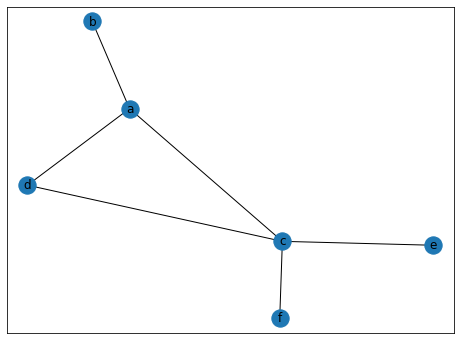

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(graph, ax=ax)

In [30]:
fig.savefig("/workdir/networkx.png")

## Visualization

https://blog.jupyter.org/interactive-graph-visualization-in-jupyter-with-ipycytoscape-a8828a54ab63

In [20]:
pos = nx.spring_layout(graph)
pos

{'a': array([-0.52190174,  0.09425555]),
 'b': array([-1.        ,  0.32564189]),
 'c': array([ 0.40979282, -0.01115702]),
 'd': array([-0.39569899, -0.45872164]),
 'e': array([0.75723908, 0.36174601]),
 'f': array([ 0.75056884, -0.31176479])}

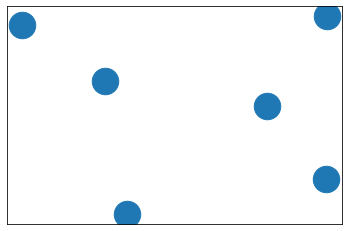

In [21]:
nx.draw_networkx_nodes(graph, pos, node_size=700)

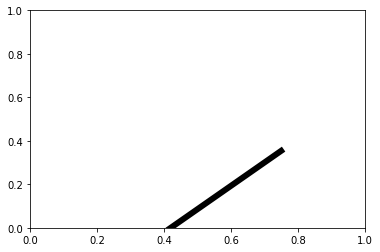

In [22]:
nx.draw_networkx_edges(graph, pos, edgelist=elarge, width=6)

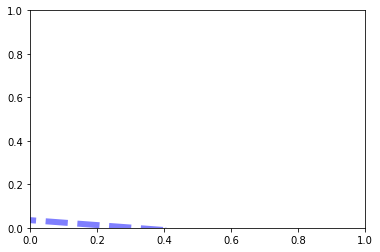

In [23]:
nx.draw_networkx_edges(
    graph, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

{'a': Text(-0.5219017365690998, 0.09425554685676928, 'a'),
 'b': Text(-1.0, 0.32564189274221367, 'b'),
 'c': Text(0.4097928153942144, -0.01115702318855791, 'c'),
 'd': Text(-0.3956989937868261, -0.4587216373044083, 'd'),
 'e': Text(0.757239076476884, 0.3617460091278071, 'e'),
 'f': Text(0.7505688384848274, -0.3117647882338241, 'f')}

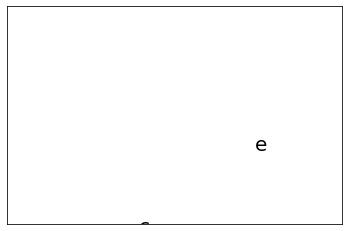

In [24]:
nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

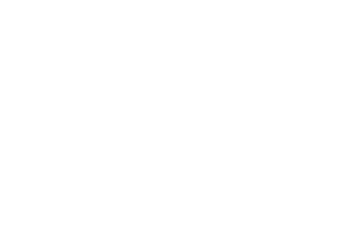

In [25]:
plt.axis("off")
plt.show()

In [15]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

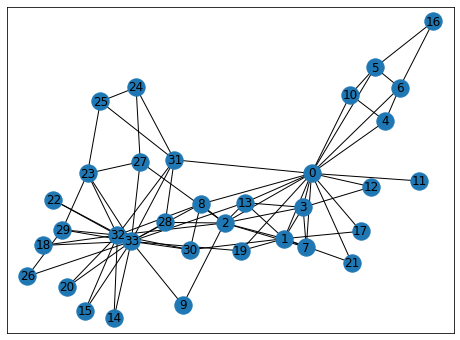

In [26]:
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(g, ax=ax)

## References 

https://github.com/networkx/networkx

https://networkx.org/

[Reading and Writing Graphs](https://networkx.org/documentation/stable/reference/readwrite/index.html)